In [5]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [6]:
# Read in the generation-levels-detail by dataset
# Data from https://www.census.gov/housing/hvs/data/histtab14.xlsx, Table 14 updaeted to filter by year, added average of quarters, removed revision rows, deleted columns
home_ownership_rates_by_year_df = pd.read_csv("./resources-KA/HomeOwnerShipByYear.csv")
home_ownership_rates_by_year_df.head()  


,Year,Region,Avg of Qtrs
0,1964,United States,63.1
1,1965,United States,63.0
2,1966,United States,63.5
3,1967,United States,63.6
4,1968,United States,63.9


In [3]:
home_ownership_rates_by_year_df.dtypes

Year             int64
Region          object
Avg of Qtrs    float64
dtype: object

In [8]:

# Update Year column to integer
# Remove rows with non-finite 'Year' values
home_ownership_rates_by_year_df = home_ownership_rates_by_year_df[home_ownership_rates_by_year_df['Year'].notna()]

# Change the 'Year' column to datetime format, extract the year, and convert it to integer
home_ownership_rates_by_year_df['Year'] = pd.to_datetime(home_ownership_rates_by_year_df['Year'], format='%Y').dt.year.astype(int)

# Display the DataFrame
home_ownership_rates_by_year_df.head()

,Year,Region,Avg of Qtrs
0,1964,United States,63.1
1,1965,United States,63.0
2,1966,United States,63.5
3,1967,United States,63.6
4,1968,United States,63.9


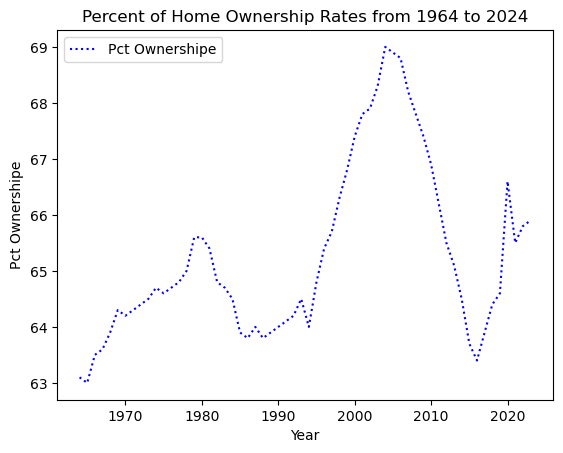

In [9]:
# Create a line chart to show the average of quarters from 1964 to 2024 for home ownership rates
# Define line styles
line_styles = [':']
plt.figsize=(20,10)
# Create a line chart
plt.plot(home_ownership_rates_by_year_df['Year'], home_ownership_rates_by_year_df['Avg of Qtrs'], linestyle=':', color='blue', label='Pct Ownershipe')


# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Pct Ownershipe')
plt.title('Percent of Home Ownership Rates from 1964 to 2024')
plt.legend()

# Display the plot
plt.show()

In [10]:
# Read in the how home ownership rates have changed by age group over the years dataset 
# Data from https://www.census.gov/housing/hvs/data/histtab19.xlsx, Table 19 updaeted to filter by year, 
ownership_rates_by_age_year_df = pd.read_csv("./resources-KA/HomeOwnership_By_Age_Year.csv")
ownership_rates_by_age_year_df.head(122)  

,Year,Qtr,U.S.,Under 35 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1994.0,1st,63.8,37.1,64.4,75.0,79.3,77.4,NaN,NaN,NaN,NaN,NaN
1,1994.0,3rd,63.8,36.8,64.6,75.2,79.1,77.2,NaN,NaN,NaN,NaN,NaN
2,1994.0,3rd,64.1,37.5,64.3,75.5,79.4,77.2,NaN,NaN,NaN,NaN,NaN
3,1994.0,4th,64.2,38.0,64.7,74.9,79.2,77.7,NaN,NaN,NaN,NaN,NaN
4,1995.0,1st,64.2,37.7,64.9,74.9,79.4,77.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2023.0,2nd,65.9,38.5,63.1,70.8,75.5,78.9,NaN,NaN,NaN,NaN,NaN
118,2023.0,3rd,66.0,38.3,62.9,71.0,75.4,79.2,NaN,NaN,NaN,NaN,NaN
119,2023.0,4th,65.7,38.1,62.0,70.3,76.0,79.0,NaN,NaN,NaN,NaN,NaN
120,2024.0,1st,65.6,37.7,61.4,70.8,76.3,78.7,NaN,NaN,NaN,NaN,NaN


In [11]:
ownership_rates_by_age_year_df.dtypes

Year                  float64
Qtr                    object
U.S.                  float64
Under 35 years        float64
35 to 44 years        float64
45 to 54 years        float64
55 to 64 years        float64
65 years and over     float64
Unnamed: 8            float64
Unnamed: 9            float64
Unnamed: 10           float64
Unnamed: 11           float64
Unnamed: 12           float64
dtype: object

In [12]:
# Remove decimal values from the 'Year' column
# Fill NA values with 0
ownership_rates_by_age_year_df['Year'] = ownership_rates_by_age_year_df['Year'].fillna(0)

# Change the data type of the 'Year' column to int64
ownership_rates_by_age_year_df['Year'] = ownership_rates_by_age_year_df['Year'].astype('int64')

# Display the DataFrame
ownership_rates_by_age_year_df.head()

,Year,Qtr,U.S.,Under 35 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1994,1st,63.8,37.1,64.4,75.0,79.3,77.4,NaN,NaN,NaN,NaN,NaN
1,1994,3rd,63.8,36.8,64.6,75.2,79.1,77.2,NaN,NaN,NaN,NaN,NaN
2,1994,3rd,64.1,37.5,64.3,75.5,79.4,77.2,NaN,NaN,NaN,NaN,NaN
3,1994,4th,64.2,38.0,64.7,74.9,79.2,77.7,NaN,NaN,NaN,NaN,NaN
4,1995,1st,64.2,37.7,64.9,74.9,79.4,77.5,NaN,NaN,NaN,NaN,NaN


In [13]:
# Convert columns to 1 decimal place for averaged values
# Select all columns except 'Year'
cols = [col for col in ownership_rates_by_age_year_df.columns if col != 'Year']

# Change the format of selected columns to one decimal place
ownership_rates_by_age_year_df[cols] = ownership_rates_by_age_year_df[cols].round(1)

# Display the DataFrame
ownership_rates_by_age_year_df.head()

,Year,Qtr,U.S.,Under 35 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1994,1st,63.8,37.1,64.4,75.0,79.3,77.4,NaN,NaN,NaN,NaN,NaN
1,1994,3rd,63.8,36.8,64.6,75.2,79.1,77.2,NaN,NaN,NaN,NaN,NaN
2,1994,3rd,64.1,37.5,64.3,75.5,79.4,77.2,NaN,NaN,NaN,NaN,NaN
3,1994,4th,64.2,38.0,64.7,74.9,79.2,77.7,NaN,NaN,NaN,NaN,NaN
4,1995,1st,64.2,37.7,64.9,74.9,79.4,77.5,NaN,NaN,NaN,NaN,NaN


In [14]:
# Data frame clean up
# Delete the 'Qtr' column
ownership_rates_by_age_year_df = ownership_rates_by_age_year_df.drop('Qtr', axis=1)


# Display the DataFrame
ownership_rates_by_age_year_df.head()

,Year,U.S.,Under 35 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1994,63.8,37.1,64.4,75.0,79.3,77.4,NaN,NaN,NaN,NaN,NaN
1,1994,63.8,36.8,64.6,75.2,79.1,77.2,NaN,NaN,NaN,NaN,NaN
2,1994,64.1,37.5,64.3,75.5,79.4,77.2,NaN,NaN,NaN,NaN,NaN
3,1994,64.2,38.0,64.7,74.9,79.2,77.7,NaN,NaN,NaN,NaN,NaN
4,1995,64.2,37.7,64.9,74.9,79.4,77.5,NaN,NaN,NaN,NaN,NaN


In [70]:

# Delete all unnamed columns
ownership_rates_by_age_year_df = ownership_rates_by_age_year_df.loc[:, ~ownership_rates_by_age_year_df.columns.str.contains('^Unnamed')]

# Display the DataFrame
ownership_rates_by_age_year_df.head(112)

,U.S.,Under 35 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over
Year,,,,,,
1994,63.8,37.1,64.4,75.0,79.3,77.4
1994,63.8,36.8,64.6,75.2,79.1,77.2
1994,64.1,37.5,64.3,75.5,79.4,77.2
1994,64.2,38.0,64.7,74.9,79.2,77.7
1995,64.2,37.7,64.9,74.9,79.4,77.5
...,...,...,...,...,...,...
2020,65.8,38.5,61.0,69.8,76.0,80.2
2021,65.6,38.1,62.0,69.4,75.7,79.3
2021,65.4,37.8,61.3,69.4,75.4,79.6


In [71]:
# Display only years 1994, 2007, and 2023 from the DataFrame for age 35 comparison
ownership_rates_by_age_year_df.loc[[1994, 2007, 2023]]

,U.S.,Under 35 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over
Year,,,,,,
1994,63.8,37.1,64.4,75.0,79.3,77.4
1994,63.8,36.8,64.6,75.2,79.1,77.2
1994,64.1,37.5,64.3,75.5,79.4,77.2
1994,64.2,38.0,64.7,74.9,79.2,77.7
2007,68.4,41.7,68.3,75.8,80.4,80.9
2007,68.2,41.9,67.6,75.5,80.6,80.5
2007,68.2,42.0,68.1,75.2,81.1,79.9
2007,67.8,41.0,67.2,75.1,80.4,80.3
2023,66.0,39.3,62.6,70.1,76.1,78.8


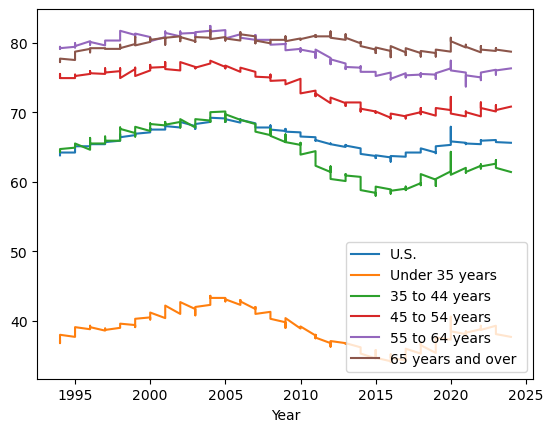

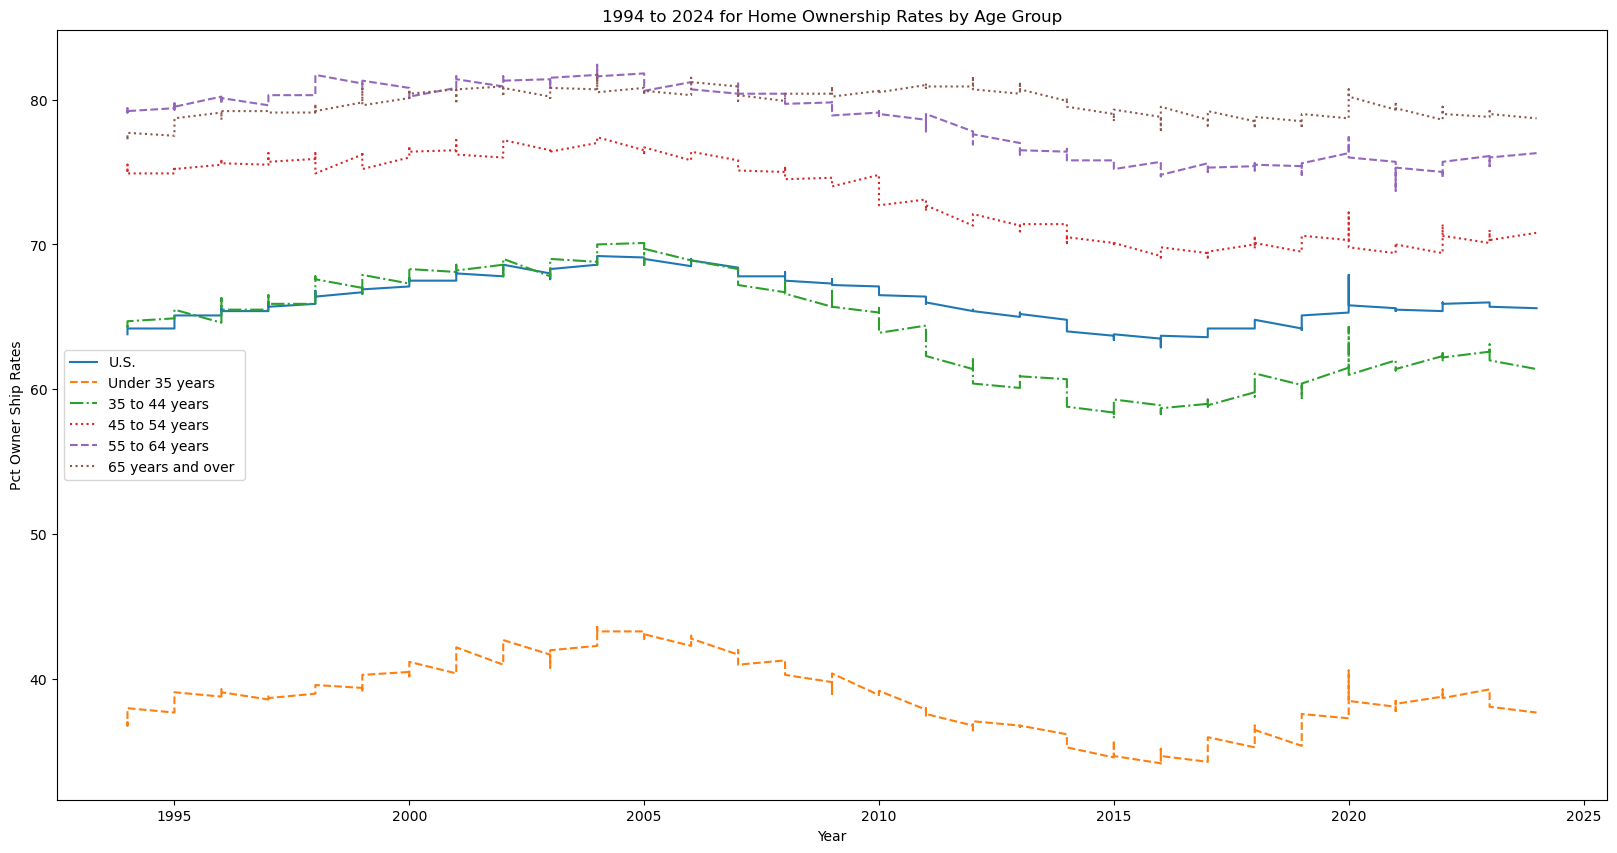

In [72]:
# Create a line chart to show the average of quarters from 1964 to 2024 for home ownership rates
# plt.figsize=(20,10)
# # Set 'Year' as index 
# if 'Year' in ownership_rates_by_age_year_df.columns:
#     ownership_rates_by_age_year_df.set_index('Year', inplace=True)

# Create a line chart for all columns
ownership_rates_by_age_year_df.plot(kind='line')
# # Define line styles
line_styles = ['-', '--', '-.', ':', '--', ':']

# Create a new figure with specified size
plt.figure(figsize=(20, 10))

# Loop through each column
for i, column in enumerate(ownership_rates_by_age_year_df.columns):
    # Plot each column with a different line style
    ownership_rates_by_age_year_df[column].plot(kind='line', style=line_styles[i % len(line_styles)])

# Set the title and labels
plt.title('1994 to 2024 for Home Ownership Rates by Age Group')
plt.xlabel('Year')
plt.ylabel('Pct Owner Ship Rates')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [74]:
# Display only years 1994, 2007, and 2023 from the DataFrame for age 35 comparison
# Group by year and average the values
grouped_df = ownership_rates_by_age_year_df.groupby('Year').mean()

# Display only the rows for the years 1994, 2007, and 2023
grouped_df.loc[[1994, 2007, 2023]]

,U.S.,Under 35 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over
Year,,,,,,
1994,63.975,37.35,64.50,75.15,79.250,77.375
2007,68.150,41.65,67.80,75.40,80.625,80.400
2023,65.900,38.55,62.65,70.55,75.750,78.975


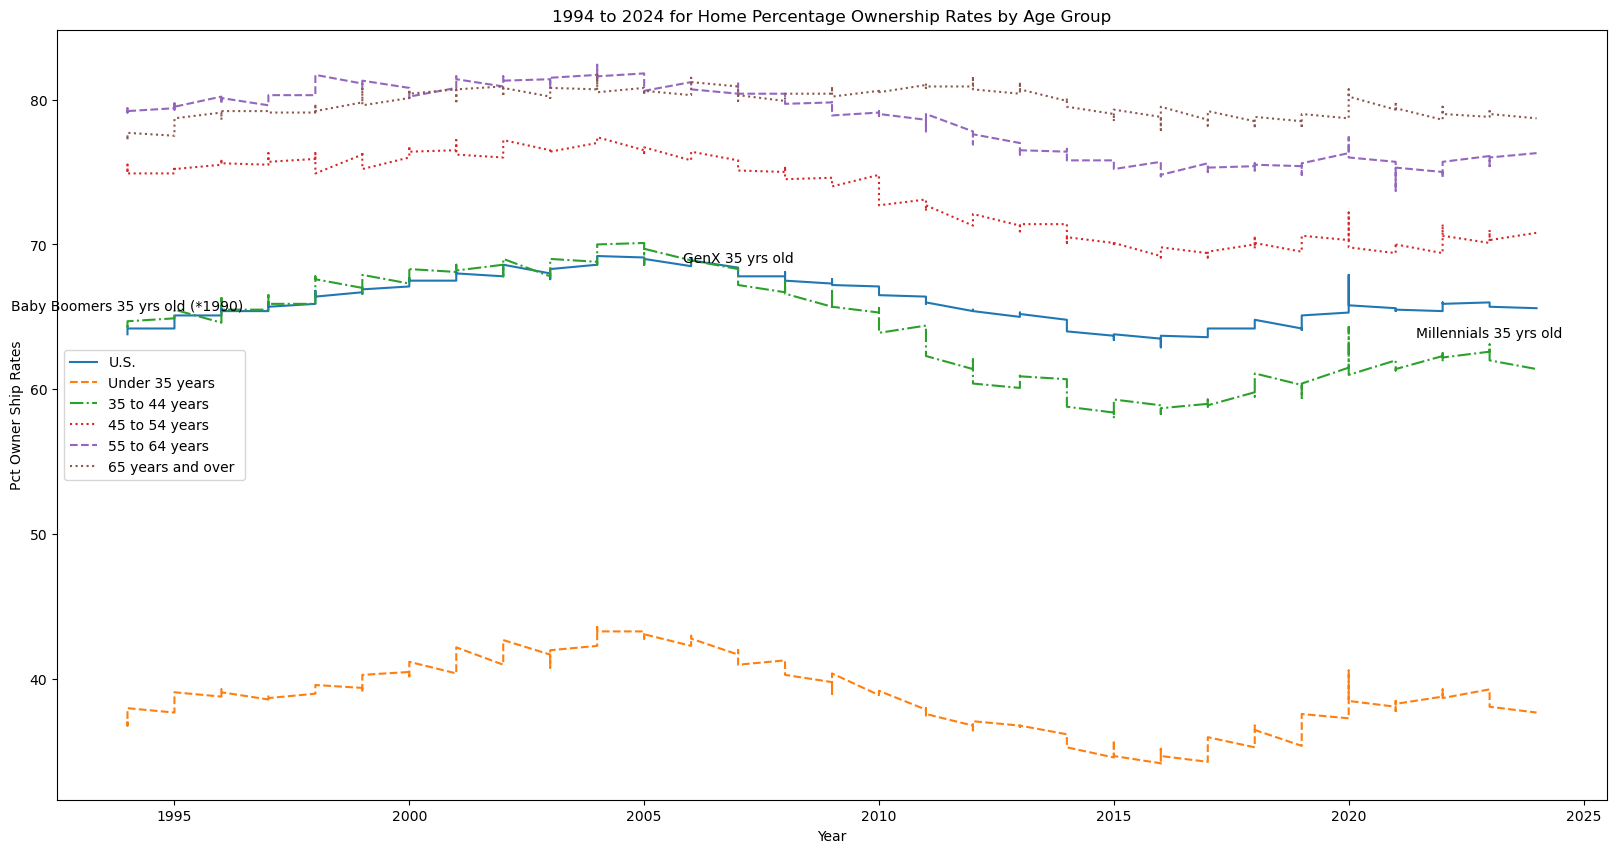

In [75]:
# Create a new figure with specified size
plt.figure(figsize=(20, 10))

line_styles = ['-', '--', '-.', ':', '--', ':']
# Loop through each column
for i, column in enumerate(ownership_rates_by_age_year_df.columns):
    # Plot each column with a different line style
    ownership_rates_by_age_year_df[column].plot(kind='line', style=line_styles[i % len(line_styles)])

# Set the title and labels
plt.title('1994 to 2024 for Home Percentage Ownership Rates by Age Group')
plt.xlabel('Year')
plt.ylabel('Pct Owner Ship Rates')

# Add a label for the year 1990 for BabyBoom at 35 years old in 35-44 chart' column
year = 1994
label = 'Baby Boomers 35 yrs old (*1990)'
plt.annotate(label, 
             (year, ownership_rates_by_age_year_df.loc[year, '35 to 44 years '].mean()), 
             textcoords="offset points", 
             xytext=(0,10), 
             ha='center')

# Add a label for the year 1990 for GenX at 35 years old in 35-44 chart' column
year = 2007
label = 'GenX 35 yrs old'
plt.annotate(label, 
             (year, ownership_rates_by_age_year_df.loc[year, '35 to 44 years '].mean()), 
             textcoords="offset points", 
             xytext=(0,10), 
             ha='center')

# Add a label for the year 2023 for Millennials at 25 years oold in 35-44 chart' column
year = 2023
label = 'Millennials 35 yrs old'
plt.annotate(label, 
             (year, ownership_rates_by_age_year_df.loc[year, '35 to 44 years '].mean()), 
             textcoords="offset points", 
             xytext=(0,10), 
             ha='center')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [35]:
print(ownership_rates_by_age_year_df.columns)

Index(['U.S.', 'Under 35 years ', '35 to 44 years ', '45 to 54 years ',
       '55 to 64 years ', '65 years and over '],
      dtype='object')


In [38]:
# Read in the how the average home price has chabnged over the years dataset 
# Data from?!!!!, to filter by year, 
avg_sales_price_of_homes_df = pd.read_csv("./resources-KA/Average Sales Price of Homes in United States.csv")
avg_sales_price_of_homes_df.head(122)  

,DATE,Average Sales Price of Homes in US
0,1/1/1963,19300
1,4/1/1963,19400
2,7/1/1963,19200
3,10/1/1963,19600
4,1/1/1964,19600
...,...,...
117,4/1/1992,145300
118,7/1/1992,141700
119,10/1/1992,147200
120,1/1/1993,144700


In [39]:
avg_sales_price_of_homes_df.dtypes

DATE                                  object
Average Sales Price of Homes in US     int64
dtype: object

In [40]:
# Update dataframe to include Year column based on date, this will be used to sum by year vs quarter
# Convert the 'Date' column to datetime
avg_sales_price_of_homes_df['DATE'] = pd.to_datetime(avg_sales_price_of_homes_df['DATE'], format='%d/%m/%Y')

# Extract the year and create a new column 'Year'
avg_sales_price_of_homes_df['Year'] = avg_sales_price_of_homes_df['DATE'].dt.year


# Display the DataFrame

avg_sales_price_of_homes_df.head(122)  

,DATE,Average Sales Price of Homes in US,Year
0,1963-01-01,19300,1963
1,1963-01-04,19400,1963
2,1963-01-07,19200,1963
3,1963-01-10,19600,1963
4,1964-01-01,19600,1964
...,...,...,...
117,1992-01-04,145300,1992
118,1992-01-07,141700,1992
119,1992-01-10,147200,1992
120,1993-01-01,144700,1993


In [41]:
# Delete the 'DATE' column
avg_sales_price_of_homes_df = avg_sales_price_of_homes_df.drop(columns=['DATE'])
avg_sales_price_of_homes_df.head(122)  

,Average Sales Price of Homes in US,Year
0,19300,1963
1,19400,1963
2,19200,1963
3,19600,1963
4,19600,1964
...,...,...
117,145300,1992
118,141700,1992
119,147200,1992
120,144700,1993


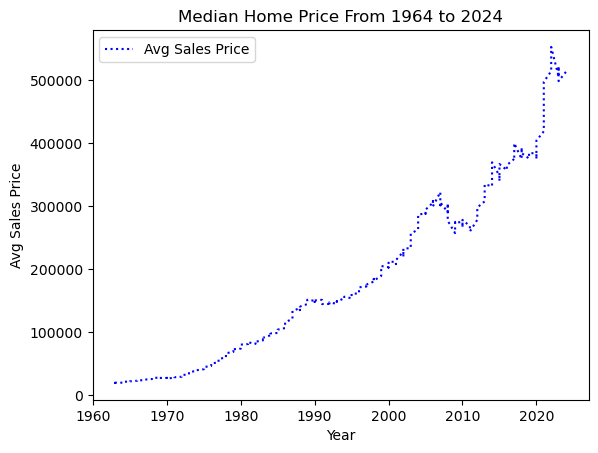

In [42]:
# Create a line chart to show the Median home price from 1964 to 2024
# Define line styles
line_styles = [':']
plt.figsize=(20,10)
# Create a line chart
plt.plot(avg_sales_price_of_homes_df['Year'], avg_sales_price_of_homes_df['Average Sales Price of Homes in US'], linestyle=':', color='blue', label='Avg Sales Price')


# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Avg Sales Price')
plt.title('Median Home Price From 1964 to 2024')
plt.legend()

# Display the plot
plt.show()

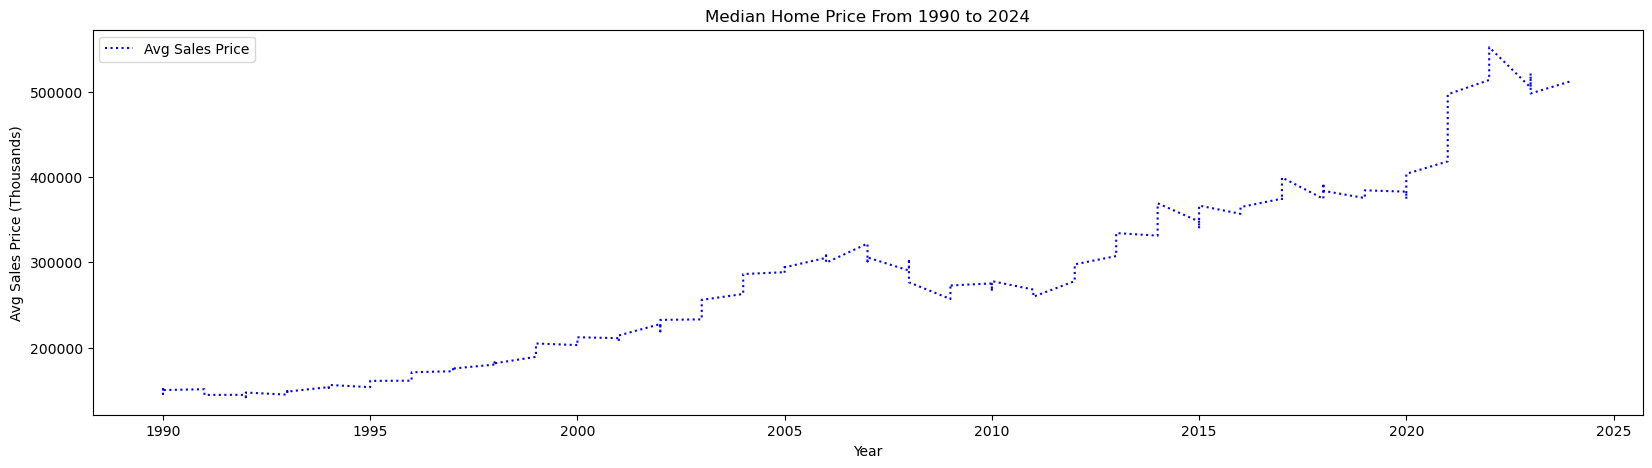

In [65]:
# Filter the DataFrame to include only the years from 1990 to 2024
avg_sales_price_of_homes_df = avg_sales_price_of_homes_df[(avg_sales_price_of_homes_df['Year'] >= 1990) & (avg_sales_price_of_homes_df['Year'] <= 2024)]
plt.figure(figsize=(20, 5))
# Create a line chart
plt.plot(avg_sales_price_of_homes_df['Year'], avg_sales_price_of_homes_df['Average Sales Price of Homes in US'], linestyle=':', color='blue', label='Avg Sales Price')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Avg Sales Price (Thousands)')
plt.title('Median Home Price From 1990 to 2024')
plt.legend()

# Display the plot
plt.show()

In [45]:
# Read in the how the Median Household Income has changed over the years dataset
# Data from?!!!!, to filter by year, 
median_household_income_df = pd.read_csv("./resources-KA/Median Household Income in the United States.csv")


# Display the DataFrame

median_household_income_df.head(122)  

,DATE,Median Household Income,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1984,56780,NaN,NaN,NaN,NaN,NaN
1,1985,57860,NaN,NaN,NaN,NaN,NaN
2,1986,60010,NaN,NaN,NaN,NaN,NaN
3,1987,60760,NaN,NaN,NaN,NaN,NaN
4,1988,61210,NaN,NaN,NaN,NaN,NaN
5,1989,62260,NaN,NaN,NaN,NaN,NaN
6,1990,61500,NaN,NaN,NaN,NaN,NaN
7,1991,59710,NaN,NaN,NaN,NaN,NaN
8,1992,59210,NaN,NaN,NaN,NaN,NaN
9,1993,58920,NaN,NaN,NaN,NaN,NaN


In [46]:

# Delete all unnamed columns
median_household_income_df = median_household_income_df.loc[:, ~median_household_income_df.columns.str.contains('^Unnamed')]

# Display the DataFrame
median_household_income_df.head()

,DATE,Median Household Income
0,1984,56780
1,1985,57860
2,1986,60010
3,1987,60760
4,1988,61210


In [47]:
# Rename the 'Date' column to 'Year'

median_household_income_df = median_household_income_df.rename(columns={'DATE': 'Year'})


# Display the DataFrame

median_household_income_df.head(122)  

,Year,Median Household Income
0,1984,56780
1,1985,57860
2,1986,60010
3,1987,60760
4,1988,61210
5,1989,62260
6,1990,61500
7,1991,59710
8,1992,59210
9,1993,58920


In [48]:
median_household_income_df.dtypes

Year                       int64
Median Household Income    int64
dtype: object

In [49]:

print(median_household_income_df.columns)

Index(['Year', 'Median Household Income'], dtype='object')


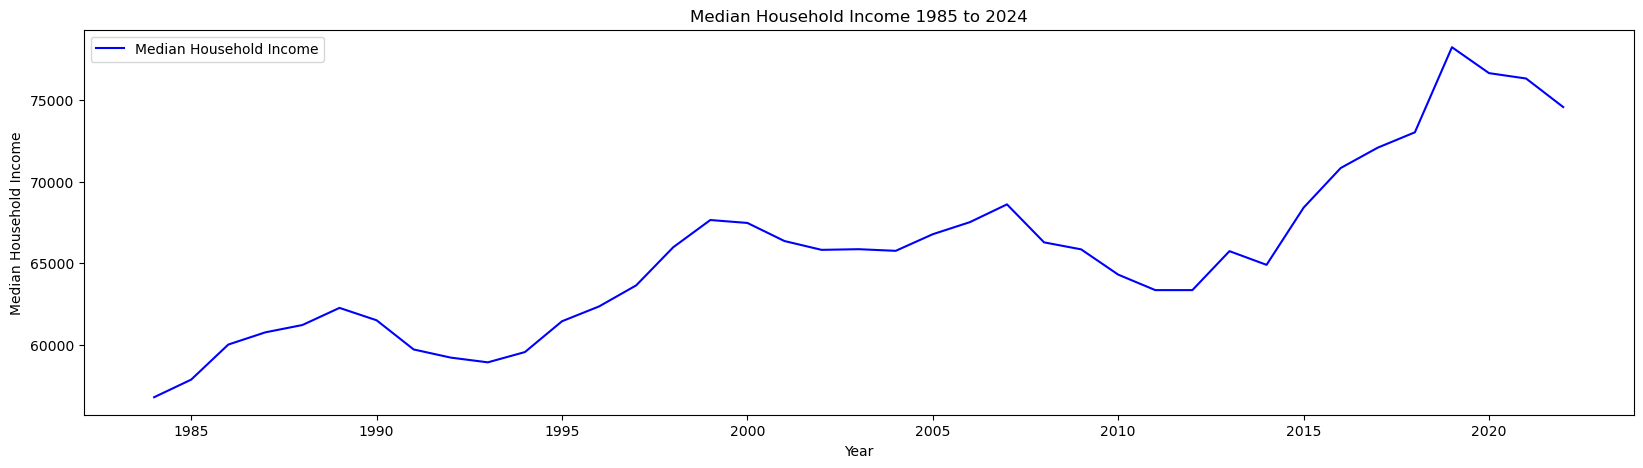

In [67]:
# Create a line chart to show the median household income from 1984 to 2024
plt.figure(figsize=(20, 5))
# Create a line chart
plt.plot(median_household_income_df['Year'], median_household_income_df['Median Household Income'], linestyle='-', color='blue', label='Median Household Income')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Median Household Income')
plt.title('Median Household Income 1985 to 2024')
plt.legend()

# Display the plot
plt.show()

In [51]:
# Join income & home price data for comparison

# Join the DataFrames on the 'Year' column
merged_df = pd.merge(median_household_income_df, avg_sales_price_of_homes_df, on='Year')

# Display the merged DataFrame
merged_df.head(125)

,Year,Median Household Income,Average Sales Price of Homes in US
0,1990,61500,149500
1,1990,61500,151200
2,1990,61500,145500
3,1990,61500,150100
4,1991,59710,151100
...,...,...,...
120,2020,76660,383000
121,2020,76660,374500
122,2020,76660,397800
123,2020,76660,403900


In [52]:
# Group by 'Year' and calculate the median household income and average sales price of homes for each year
grouped_df = merged_df.groupby('Year').agg({'Median Household Income': 'median', 'Average Sales Price of Homes in US': 'mean'})

# Display the grouped DataFrame
grouped_df.head()

,Median Household Income,Average Sales Price of Homes in US
Year,,
1990,61500.0,149075.0
1991,59710.0,147275.0
1992,59210.0,144675.0
1993,58920.0,147475.0
1994,59550.0,154175.0


In [53]:
# Rename the column
grouped_df = grouped_df.rename(columns={'Average Sales Price of Homes in US': 'Average Home Sales Price'})

# Display the DataFrame
grouped_df.head()

,Median Household Income,Average Home Sales Price
Year,,
1990,61500.0,149075.0
1991,59710.0,147275.0
1992,59210.0,144675.0
1993,58920.0,147475.0
1994,59550.0,154175.0


In [54]:
# Add a calculated column
grouped_df['Percentage'] = (grouped_df['Median Household Income'] / grouped_df['Average Home Sales Price']) * 100
# Format the 'Percentage' column to 0 decimals
grouped_df['Percentage'] = grouped_df['Percentage'].round(0)

# Display the DataFrame
grouped_df.head(125)

,Median Household Income,Average Home Sales Price,Percentage
Year,,,
1990,61500.0,149075.0,41.0
1991,59710.0,147275.0,41.0
1992,59210.0,144675.0,41.0
1993,58920.0,147475.0,40.0
1994,59550.0,154175.0,39.0
1995,61440.0,157750.0,39.0
1996,62350.0,165525.0,38.0
1997,63640.0,174875.0,36.0
1998,65980.0,181150.0,36.0


<Figure size 2000x500 with 0 Axes>

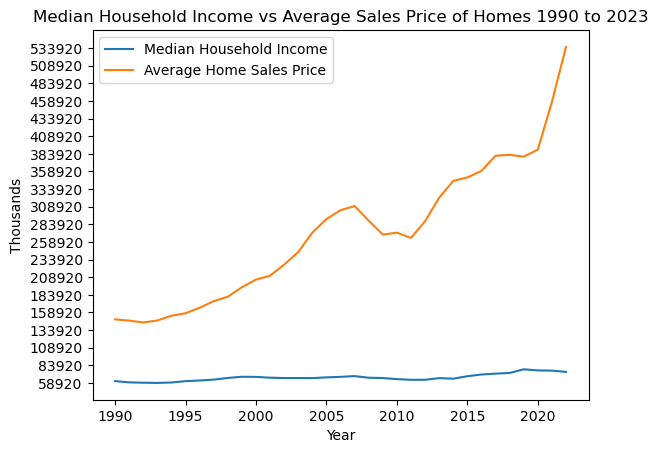

In [66]:
# Create line chart compairing Median Household Income vs Average Sales Price of Homes from 1990 to 2023

# Create a new figure with specified size
plt.figure(figsize=(20, 5))

# Create a line plot
grouped_df[['Median Household Income', 'Average Home Sales Price']].plot(kind='line')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Thousands')
plt.title('Median Household Income vs Average Sales Price of Homes 1990 to 2023')

# Set y-axis labels to increments of 50000
plt.yticks(np.arange(min(grouped_df['Median Household Income']), max(grouped_df['Average Home Sales Price']) + 1, 25000))

# Display the plot
plt.show()

Text(0.5, 1.0, 'Income as Percentage of Median Homes Sales Price 1990 to 2023')

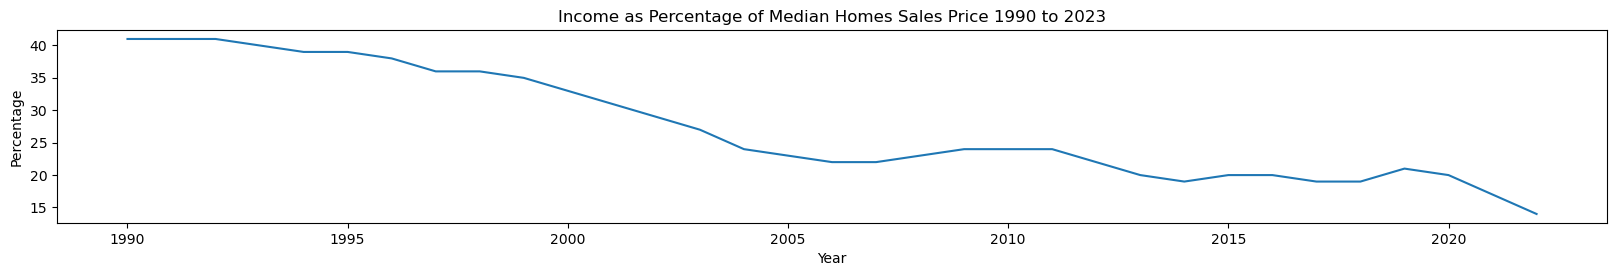

In [56]:

# Set the figure size
plt.figure(figsize=(20, 2.5))

# Create a line plot for 'Percentage'
grouped_df['Percentage'].plot(kind='line')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Income as Percentage of Median Homes Sales Price 1990 to 2023')

# Display the 

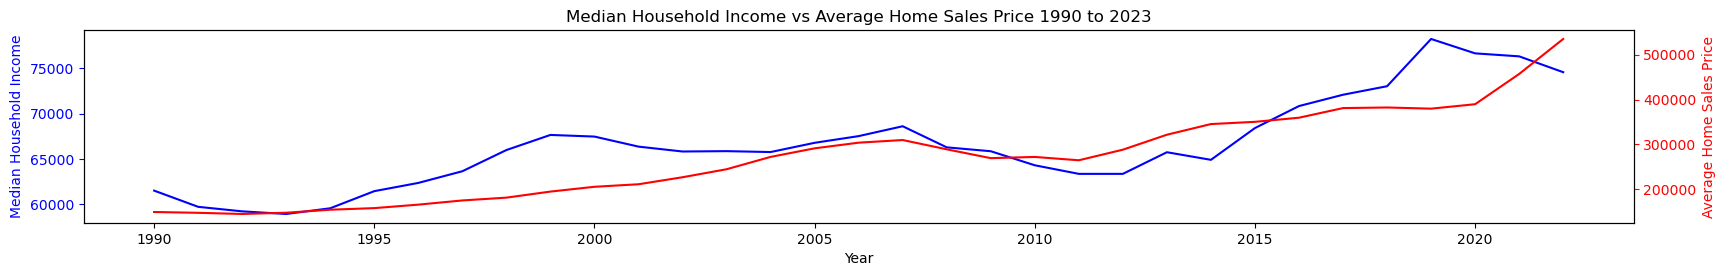

In [57]:
# Python
fig, ax1 = plt.subplots(figsize=(20, 2.5))

# Create a line plot for 'Median Household Income'
ax1.plot(grouped_df.index, grouped_df['Median Household Income'], color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Median Household Income', color='b')
ax1.tick_params('y', colors='b')

# Create a secondary y-axis for 'Average Home Sales Price'
ax2 = ax1.twinx()
ax2.plot(grouped_df.index, grouped_df['Average Home Sales Price'], color='r')
ax2.set_ylabel('Average Home Sales Price', color='r')
ax2.tick_params('y', colors='r')

# Add a title
plt.title('Median Household Income vs Average Home Sales Price 1990 to 2023')

# Display the plot
plt.show()